In [11]:
import numpy as np
from CartPole import *

In [12]:
"""introduce noise in the observed dynamics"""
def lin_reg(X,Y):
    X = np.matrix(X)
    XT = np.matrix.transpose(X)
    Y = np.matrix(Y)
    XT_X = np.matmul(XT, X)
    XT_Y = np.matmul(XT, Y)
    betas = np.matmul(np.linalg.inv(XT_X), XT_Y)
    return betas

In [39]:
"""generating random states X and corresponding Y with noise"""
cartpole1 = CartPole()
X = []
Y = []
N = 1000 # no of datapoints
for i in range(N):
    x = np.random.uniform([-5,5,1])[0]
    x_dot = np.random.uniform([-10,10,1])[0]
    theta = np.random.uniform([-np.pi,np.pi,1])[0]
    theta_dot = np.random.uniform([-15,15,1])[0]
    Xn = np.array([x,x_dot,theta,theta_dot])
    cartpole1.setState(Xn)
    # generate Gaussian noise in system dynamics
    noise = np.random.normal(0,.1,Xn.shape)
    Xn += noise
    X.append(Xn)
    cartpole1.performAction()
    cartpole1.remap_angle()
    Xn_1 = np.array(cartpole1.getState())
    # generate Guassian noise in observed data
    noise = np.random.normal(0,1.,Xn_1.shape)
    Xn_1 += noise
    Y.append(Xn_1-Xn)
X = np.array(X)
Y = np.array(Y)

In [40]:
coef = lin_reg(X,Y)
print(coef)
Y_predict = np.matmul(X,coef)
Y_predict = np.array(Y_predict)

[[ 0.02284923  0.04635178  0.1308155   0.25190452]
 [ 0.20250829  0.06777321  0.11125539  0.22401136]
 [-0.01102316 -0.34529369 -1.63646006 -0.14953533]
 [ 0.00206861  0.07715638 -0.04681174 -0.04169519]]


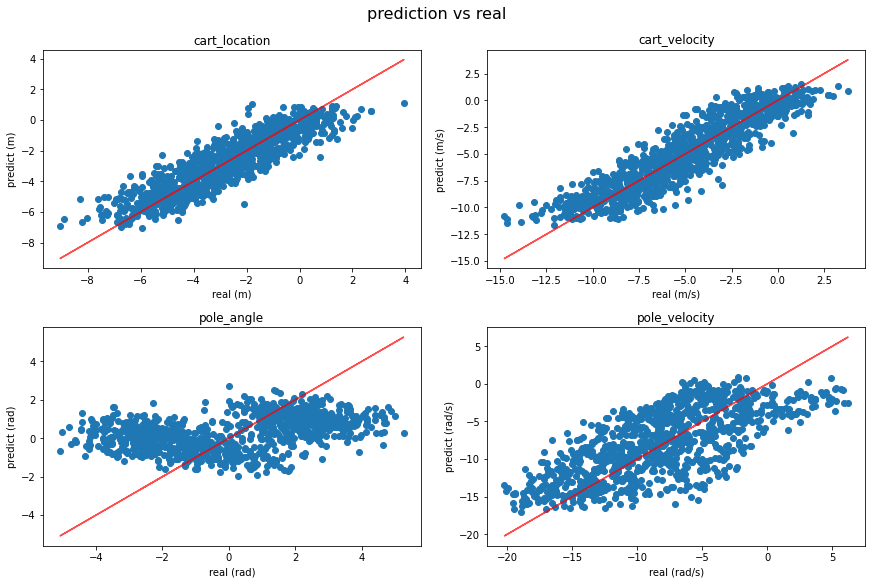

In [41]:
"""plotting comparison - real vs predict"""

fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)

axs[0,0].scatter(Y[:,0]+X[:,0],Y_predict[:,0]+X[:,0])
axs[0,0].plot(Y[:,0]+X[:,0],Y[:,0]+X[:,0],color='r',alpha=0.7)
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('real (m)')
axs[0,0].set_ylabel('predict (m)')

axs[0,1].scatter(Y[:,1]+X[:,1],Y_predict[:,1]+X[:,1])
axs[0,1].plot(Y[:,1]+X[:,1],Y[:,1]+X[:,1],color='r',alpha=0.7)
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('real (m/s)')
axs[0,1].set_ylabel('predict (m/s)')

axs[1,0].scatter(Y[:,2]+X[:,2],Y_predict[:,2]+X[:,2])
axs[1,0].plot(Y[:,2]+X[:,2],Y[:,2]+X[:,2],color='r',alpha=0.7)
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('real (rad)')
axs[1,0].set_ylabel('predict (rad)')

axs[1,1].scatter(Y[:,3]+X[:,3],Y_predict[:,3]+X[:,3])
axs[1,1].plot(Y[:,3]+X[:,3],Y[:,3]+X[:,3],color='r',alpha=0.7)
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('real (rad/s)')
axs[1,1].set_ylabel('predict (rad/s)')

fig.suptitle('prediction vs real',fontsize=16)
plt.show()

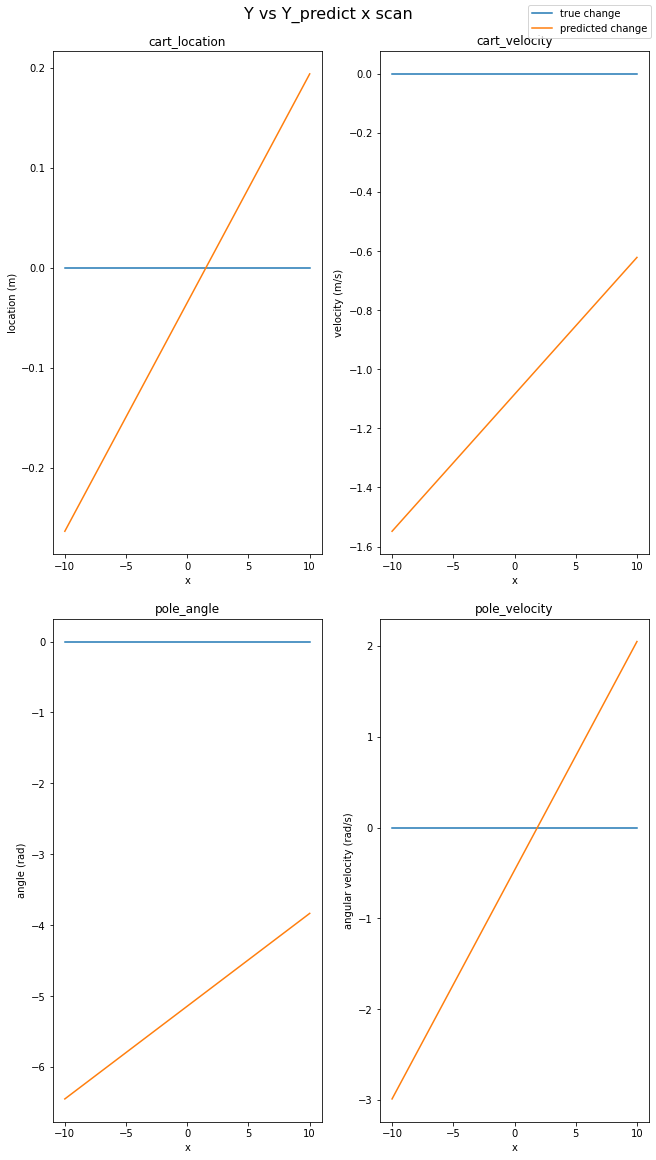

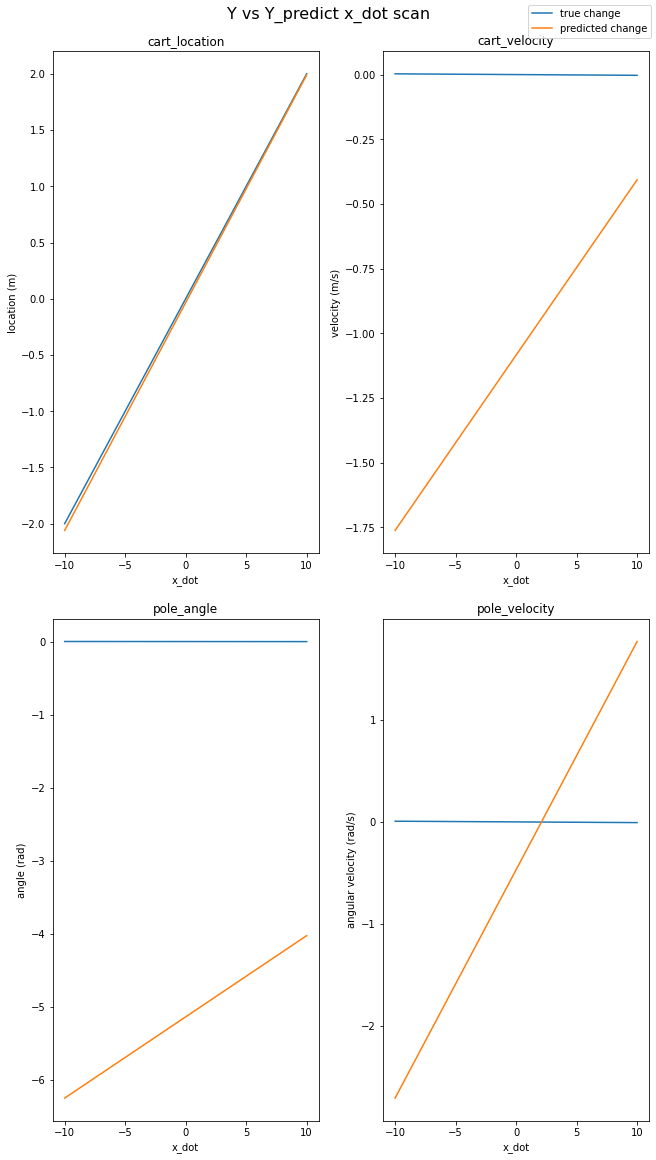

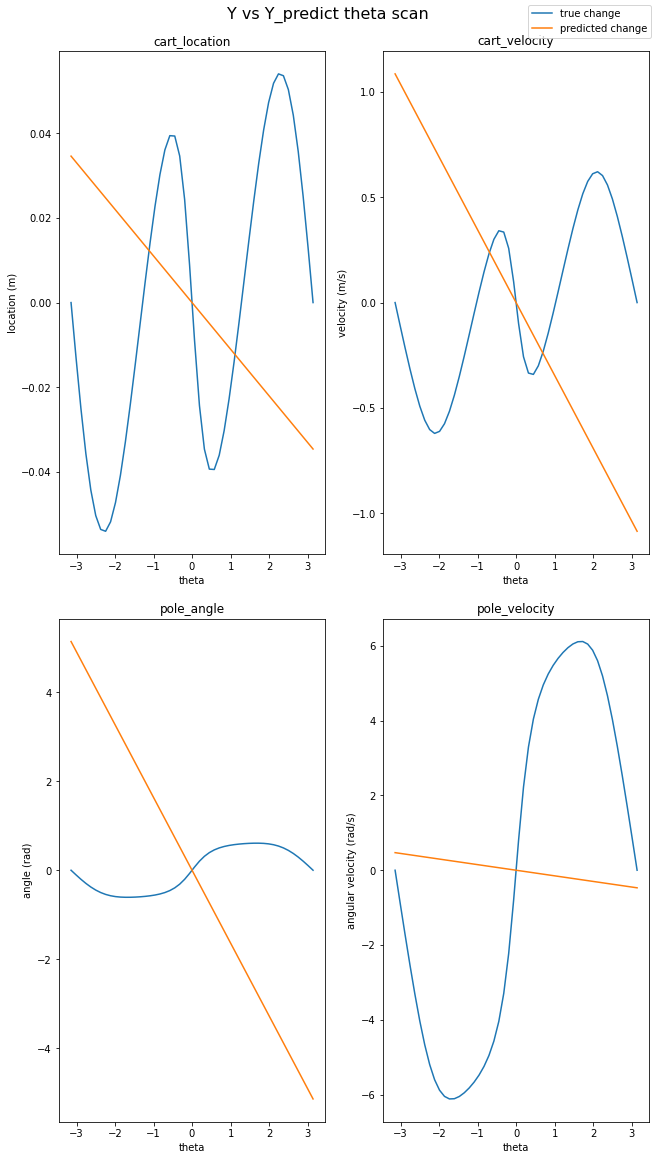

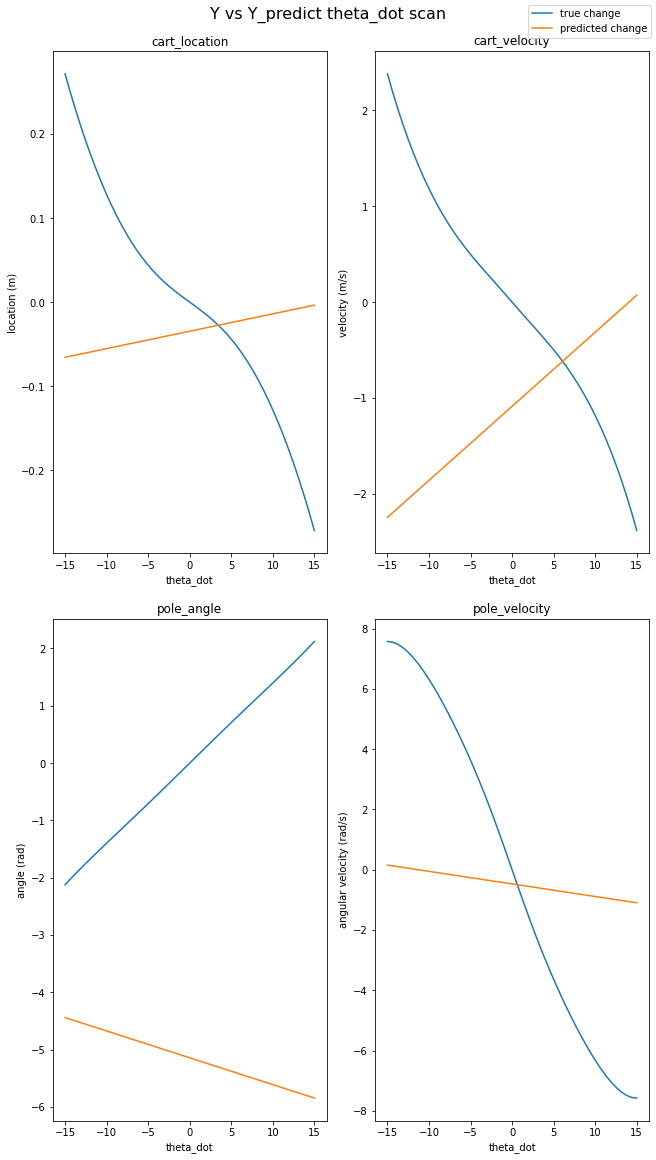

In [42]:
"""scans of variables"""
x_scan = np.linspace(-10,10,50)
x_dot_scan = np.linspace(-10,10,50)
theta_scan = np.linspace(-np.pi,np.pi,50)
theta_dot_scan = np.linspace(-15,15,50)


"""Y plot for x_dot scan"""
Y0 = []
Y0_predict = []
for x in x_scan:
    X = np.array([x,0,np.pi,0])
    y = np.matmul(X,coef)
    Y0_predict.append(y)
    cartpole1.setState(X)
    cartpole1.performAction()
    Y = np.array(cartpole1.getState())
    Y0.append((Y-X))
Y0 = np.array(Y0)
Y0_predict = np.array(Y0_predict)
Y0_predict = Y0_predict[:,0,:]

"""Y plot for x_dot scan"""
Y1 = []
Y1_predict = []
for x_dot in x_dot_scan:
    X = np.array([0,x_dot,np.pi,0])
    y = np.matmul(X,coef)
    Y1_predict.append(y)
    cartpole1.setState(X)
    cartpole1.performAction()
    Y = np.array(cartpole1.getState())
    Y1.append((Y-X))
Y1 = np.array(Y1)
Y1_predict = np.array(Y1_predict)
Y1_predict = Y1_predict[:,0,:]

"""Y plot for theta scan"""
Y2 = []
Y2_predict = []
for theta in theta_scan:
    X = np.array([0,0,theta,0])
    y = np.matmul(X,coef)
    Y2_predict.append(y)
    cartpole1.setState(X)
    cartpole1.performAction()
    Y = np.array(cartpole1.getState())
    Y2.append((Y-X))
Y2 = np.array(Y2)
Y2_predict = np.array(Y2_predict)
Y2_predict = Y2_predict[:,0,:]

"""Y plot for theta_dot scan"""
Y3 = []
Y3_predict = []
for theta_dot in theta_dot_scan:
    X = np.array([0,0,np.pi,theta_dot])
    y = np.matmul(X,coef)
    Y3_predict.append(y)
    cartpole1.setState(X)
    cartpole1.performAction()
    Y = np.array(cartpole1.getState())
    Y3.append((Y-X))
Y3 = np.array(Y3)
Y3_predict = np.array(Y3_predict)
Y3_predict = Y3_predict[:,0,:]

scan = 'x'
t = x_scan
y = Y0
yp = Y0_predict
def scans(scan,t,y,yp):
    fig, axs = plt.subplots(2,2,figsize=(9,16),constrained_layout=True)
    axs[0,0].plot(t,y[:,0],label='true change')
    axs[0,0].plot(t,yp[:,0],label='predicted change')
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel(scan)
    axs[0,0].set_ylabel('location (m)')
    axs[0,1].plot(t,y[:,1],label='true change')
    axs[0,1].plot(t,yp[:,1],label='predicted change')
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel(scan)
    axs[0,1].set_ylabel('velocity (m/s)')
    axs[1,0].plot(t,y[:,2],label='true change')
    axs[1,0].plot(t,yp[:,2],label='predicted change')
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel(scan)
    axs[1,0].set_ylabel('angle (rad)')
    axs[1,1].plot(t,y[:,3],label='true change')
    axs[1,1].plot(t,yp[:,3],label='predicted change')
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel(scan)
    axs[1,1].set_ylabel('angular velocity (rad/s)')
    fig.suptitle('Y vs Y_predict {} scan'.format(scan), fontsize=16)
    handles, labels = axs[1,1].get_legend_handles_labels()
    fig.legend(handles, labels)
    axs[0,0].autoscale()
    axs[0,1].autoscale()
    axs[1,0].autoscale()
    axs[1,1].autoscale()
    # fig.tight_layout()
    plt.show()

scans('x',x_scan,Y0,Y0_predict)
scans('x_dot',x_dot_scan,Y1,Y1_predict)
scans('theta',theta_scan,Y2,Y2_predict)
scans('theta_dot',theta_dot_scan,Y3,Y3_predict)

In [43]:
"""now for nonlinear model"""
import random

def kernel(X,Xi,sigma):
    K = np.zeros((X.shape[0],Xi.shape[0]))
    dim = X.shape[1]
    for i,x in enumerate(X):
        for j,xi in enumerate(Xi):
            sum = 0
            for k in range(dim):
                if k == 2:
                    sum += 1.0*np.sin((x[k]-xi[k])/2)**2/sigma[k]**2
                else:
                    sum += 1.0*(x[k]-xi[k])**2/sigma[k]**2
            K[i,j] = np.exp(-0.5*sum)
    return K

def fit(K_NM,K_MM,lam,Y):
    """return coefficients for each of the dimensions"""
    K_MN = np.transpose(K_NM)
    A = np.matmul(K_MN,K_NM) + lam * K_MM
    B = np.matmul(K_MN,Y)
    alpha = np.linalg.lstsq(A,B)[0]
    return alpha

def predict(X,XM,sigma,alpha):
    K_MN = kernel(X,XM,sigma)
    return np.matmul(K_MN,alpha)

def l(X,sigma):
    """X: state vector"""
    sum = 0
    for i,x in enumerate(X):
        sum += -0.5*np.linalg.norm(x)**2/sigma[i]**2
    return 1.0-np.exp(sum)

In [44]:
"""again generating the dataset"""
N = 1000 # NO of datapoints
M = 640 # NO of data locations for basis function
lam = 10**(-4) # variance of data noise

X = []
Y = []
for i in range(N):
    x = random.uniform(-5,5)
    x_dot = random.uniform(-10,10)
    theta = random.uniform(-np.pi,np.pi)
    theta_dot = random.uniform(-15,15)
    act = random.uniform(-20,20)
    # noise in the true dynamics
    # add code here
    Xn = np.array([x,x_dot,theta,theta_dot,act])
    X.append(Xn)
    cartpole1.setState(Xn[:-1])
    cartpole1.performAction(action=Xn[-1])
    Xn_1 = np.array(cartpole1.getState())
    # noise in the observed dynamics
    noise = np.random.normal(0,1.,Xn_1.shape)
    Xn_1 += noise
    Y.append(Xn_1-Xn[:-1])
X = np.array(X)
Y = np.array(Y)

M_ind = random.sample(range(N),M)
XM = np.array([X[ind] for ind in M_ind])
sigma = [np.std(X[:,i]) for i in range(X.shape[1])]
K_NM = kernel(X,XM,sigma)
K_MM = kernel(XM,XM,sigma)

In [45]:
alpha = fit(K_NM,K_MM,lam,Y)
Y_predict = predict(X,XM,sigma,alpha)

<ipython-input-43-e6f1cdb2c830>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha = np.linalg.lstsq(A,B)[0]


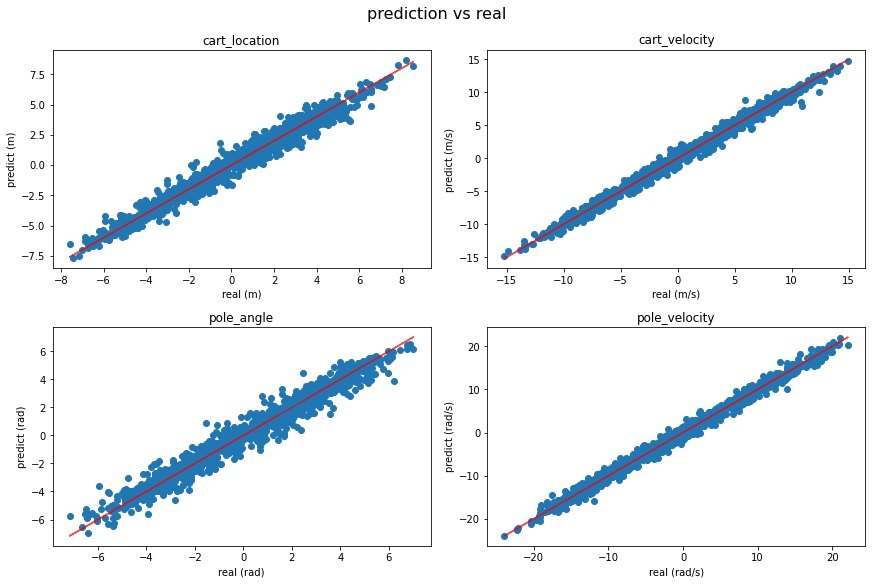

In [46]:
"""plotting the prediction"""
fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)

axs[0,0].scatter(Y[:,0]+X[:,0],Y_predict[:,0]+X[:,0])
axs[0,0].plot(Y[:,0]+X[:,0],Y[:,0]+X[:,0],color='r',alpha=0.7)
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('real (m)')
axs[0,0].set_ylabel('predict (m)')

axs[0,1].scatter(Y[:,1]+X[:,1],Y_predict[:,1]+X[:,1])
axs[0,1].plot(Y[:,1]+X[:,1],Y[:,1]+X[:,1],color='r',alpha=0.7)
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('real (m/s)')
axs[0,1].set_ylabel('predict (m/s)')

axs[1,0].scatter(Y[:,2]+X[:,2],Y_predict[:,2]+X[:,2])
axs[1,0].plot(Y[:,2]+X[:,2],Y[:,2]+X[:,2],color='r',alpha=0.7)
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('real (rad)')
axs[1,0].set_ylabel('predict (rad)')

axs[1,1].scatter(Y[:,3]+X[:,3],Y_predict[:,3]+X[:,3])
axs[1,1].plot(Y[:,3]+X[:,3],Y[:,3]+X[:,3],color='r',alpha=0.7)
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('real (rad/s)')
axs[1,1].set_ylabel('predict (rad/s)')

fig.suptitle('prediction vs real',fontsize=16)
plt.show()

In [47]:
"""for the linear policy"""
from scipy.optimize import minimize

max_t = 1.5
state1 = np.array([0,0,np.pi,-5,0])
state2 = np.array([0,0,np.pi,-14.7,0])
init_state = state1

def rolloutL(p):
    steps = int(max_t/cartpole1.delta_time) # 0.2s per step
    Xn = init_state[:-1]
    Xn_new = Xn
    cartpole = CartPole()
    X_cartpole = [Xn[:-1]]
    L_model = 0
    for i in range(steps):
        Xn = Xn_new
        # change the action term according to the policy
        cartpole.setState(Xn[:4])
        action = np.dot(p,Xn)
        cartpole.performAction(action)
        cartpole.remap_angle()
        Xn_new = np.array(cartpole.getState())
        X_cartpole.append(Xn_new)
        L_model+=loss(Xn_new)
    return L_model

def modelL(p):
    steps = int(max_t/cartpole1.delta_time) # 0.2s per step
    Xn = init_state[:-1]
    Xn_new = Xn
    L_model = 0
    for i in range(steps):
        Xn = Xn_new
        # change the action term according to the policy
        Xn[-1] = np.dot(p,Xn)
        Xn = Xn.reshape(1,Xn.shape[0])
        Yn = predict(Xn,XM,sigma,alpha)
        Yn.resize(Xn.shape)
        Xn_new = Xn + Yn
        Xn_new = np.array(Xn_new[0])
        Xn_new[2] = remap_angle(Xn_new[2])
        L_model+=loss(Xn_new[:-1])
    return L_model

In [48]:
p = np.array([-15,-10,-5,0])
res = minimize(rolloutL,p,method='Nelder-Mead')
res.x

array([ 1.35752353, -7.96872282, -2.18362097,  1.52580352])

In [49]:
p = np.array([-15,-10,-5,0])
res = minimize(modelL,p,method='Nelder-Mead')
res.x

array([-1.44834852e+01, -9.42286784e+00, -5.68431513e+00,  1.58004039e-04])